## Load Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv('Group_20_data_cleaned.csv')
df.drop('Unnamed: 0', axis = 1 , inplace = True)
df["Letter"] = pd.factorize(df['Letter'])[0]

In [2]:
df

,Letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y_ege,yegvx
0,0,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
1,1,5,12,3,7,2,10.0,5,5,4,13.0,3,9.0,2.0,8.0,4.0,10.0
2,2,4,11,6,8,6,10.0,6,2,6,10.0,3,7.0,3.0,7.0,3.0,9.0
3,3,7,11,6,6,3,5.0,9,4,6,4.0,4,10.0,6.0,10.0,2.0,8.0
4,4,2,1,3,1,1,8.0,6,6,6,6.0,5,9.0,1.0,7.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,2,3,3,2,7.0,7,7,6,6.0,6,4.0,2.0,8.0,3.0,7.0
19996,14,7,10,8,8,4,4.0,8,6,9,12.0,9,13.0,2.0,9.0,3.0,7.0
19997,0,6,9,6,7,5,6.0,11,3,7,11.0,9,5.0,2.0,12.0,2.0,4.0
19998,5,2,3,4,2,1,8.0,7,2,6,10.0,6,8.0,1.0,9.0,5.0,8.0


# ELM custom implementation

In [3]:
# # https://towardsdatascience.com/build-an-extreme-learning-machine-in-python-91d1e8958599
# # https://elm.readthedocs.io/en/latest/usage.html


# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler
# from scipy.linalg import pinv

In [4]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# X, y = df.iloc[:,2:].to_numpy(), df.target.to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)


# onehotencoder = OneHotEncoder(categories='auto')
# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# y_train = onehotencoder.fit_transform(y_train.reshape(-1, 1))
# X_test = scaler.fit_transform(X_test)
# y_test = onehotencoder.fit_transform(y_test.reshape(-1, 1))
# X_val = scaler.fit_transform(X_val)
# y_val = onehotencoder.fit_transform(y_val.reshape(-1, 1))

# print(X_train.shape, X_test.shape, X_val.shape)
# print(y_train.shape, y_test.shape, y_val.shape)


In [5]:
# input_size = X_train.shape[1]
# hidden_size = 1000

# input_weights = np.random.normal(size=[input_size,hidden_size])
# biases = np.random.normal(size=[hidden_size])

In [6]:
# def relu(x):
#    return np.maximum(x, 0, x)

# def hidden_nodes(X):
#     G = np.dot(X, input_weights)
#     G = G + biases
#     H = relu(G)
#     return H

# def predict(X):
#     out = hidden_nodes(X)
#     out = np.dot(out, output_weights)
#     return out


In [7]:
# output_weights = np.dot(pinv(hidden_nodes(X_train)), y_train)

In [8]:
# prediction = predict(X_val)
# correct = 0
# total = X_val.shape[0]

# for i in range(total):
#     predicted = np.argmax(prediction[i])
#     actual = np.argmax(y_val[i])
#     correct += 1 if predicted == actual else 0

# accuracy = correct/total
# print('Accuracy for ', hidden_size, ' hidden nodes: ', accuracy)

## SVM - linear kernel

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,1:].to_numpy(), df.Letter.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(12800, 16) (4000, 16) (3200, 16)
(12800,) (4000,) (3200,)


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

linear_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='linear',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

linear_svm_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear', random_state=0))])

In [11]:
print("Accuracy : {:.2f}%".format(linear_svm_model.score(X_val, y_val)*100))

Accuracy : 84.50%


In [12]:
confusion_matrix(y_val, linear_svm_model.predict(X_val))

array([[109,   0,   0,   0,   1,   2,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   1,   0,   0,   1,   3],
       [  0, 121,   2,   0,   0,   4,   1,   0,   0,   0,   2,   0,   0,
          3,   1,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0, 129,   3,   1,   0,   3,   0,   0,   0,   0,   2,   1,
          0,   0,   2,   0,   0,   1,   0,   0,   0,   1,   4,   0,   0],
       [  0,   0,   4, 101,   0,   0,   1,   0,   0,   1,   0,   1,   1,
          0,   0,   3,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   4,   0, 102,  10,   0,   0,   0,   2,   0,   1,   2,
          0,   7,   0,   2,   1,   0,   0,   2,   0,   2,   0,   2,   0],
       [  0,   4,   0,   0,   0,  89,   4,   0,   0,   0,   1,   0,   1,
          6,   1,   0,   0,   0,   0,   5,   0,   0,   2,   0,   0,   2],
       [  0,   1,   3,   0,   5,   1, 108,   0,   0,   0,   1,   0,   6,
          0,   0,   0,   0,   0,   0,   1,   

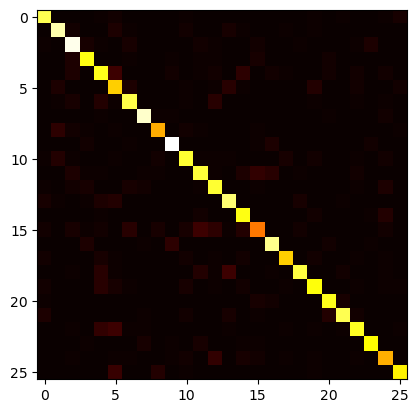

In [13]:
import matplotlib.pyplot as plt
import numpy as np

a = confusion_matrix(y_val, linear_svm_model.predict(X_val))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [14]:
print(classification_report(y_val, linear_svm_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       119
           1       0.87      0.89      0.88       136
           2       0.82      0.87      0.85       148
           3       0.86      0.89      0.87       114
           4       0.72      0.74      0.73       137
           5       0.64      0.77      0.70       115
           6       0.83      0.84      0.84       128
           7       0.93      0.95      0.94       131
           8       0.87      0.84      0.85        98
           9       0.91      0.93      0.92       142
          10       0.84      0.83      0.84       126
          11       0.80      0.78      0.79       136
          12       0.77      0.85      0.81       123
          13       0.82      0.86      0.84       131
          14       0.80      0.90      0.85       112
          15       0.76      0.61      0.67       119
          16       0.89      0.89      0.89       132
          17       0.92    

## SVM - Non-Linear Kernel

100%|█████████████████████████████████████████████| 3/3 [00:41<00:00, 13.91s/it]


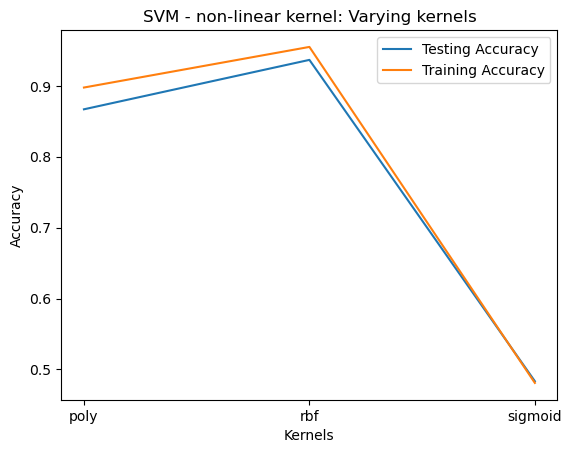

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

train_acc, test_acc = [],[]
kernels = ['poly', 'rbf', 'sigmoid']
for k in tqdm(kernels):
  non_linear_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                              kernel=k,
                                              cache_size=200,
                                              tol=0.001,
                                              random_state=0))
  
  non_linear_svm_model.fit(X_train, y_train)
  train_acc.append(non_linear_svm_model.score(X_train, y_train))
  test_acc.append(non_linear_svm_model.score(X_val, y_val))

plt.title('SVM - non-linear kernel: Varying kernels')
plt.plot(kernels,test_acc, label = 'Testing Accuracy')
plt.plot(kernels,train_acc, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

non_linear_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='rbf',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

non_linear_svm_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', random_state=0))])

In [17]:
print("Accuracy: {:.2f}%".format(non_linear_svm_model.score(X_val, y_val)*100))

Accuracy: 93.66%


[[115   0   0   0   1   0   0   0   0   0   1   0   0   2   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   1   1   0   3   0   2   0   0   1   1   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   0 139   5   0   0   1   0   0   0   0   1   0   0   0   1   0   0
    0   0   0   0   0   1   0   0]
 [  0   0   0 103   0   0   1   0   0   1   0   7   2   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 129   0   0   0   0   0   0   3   1   0   0   1   1   0
    0   0   0   0   1   0   0   0]
 [  0   0   0   0   0 108   0   0   0   0   1   0   1   3   0   0   0   0
    0   2   0   0   0   0   0   0]
 [  0   0   2   0   2   5 114   0   0   0   1   0   3   0   0   1   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 130   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   4   1   1   0   1   0   1  88   0   0   1   0   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   3  

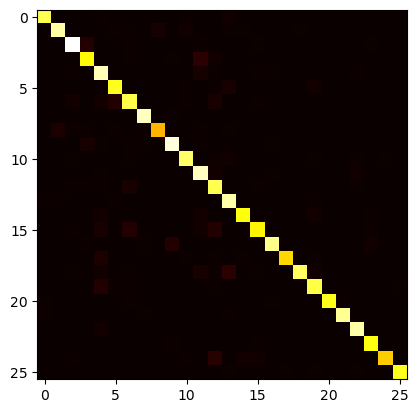

In [18]:
print(confusion_matrix(y_val, non_linear_svm_model.predict(X_val)))
import matplotlib.pyplot as plt
import numpy as np

a = confusion_matrix(y_val, non_linear_svm_model.predict(X_val))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [19]:
print("Classification Report: ",classification_report(y_val, non_linear_svm_model.predict(X_val)))

Classification Report:                precision    recall  f1-score   support

           0       0.97      0.97      0.97       119
           1       0.96      0.93      0.94       136
           2       0.94      0.94      0.94       148
           3       0.90      0.90      0.90       114
           4       0.84      0.94      0.89       137
           5       0.92      0.94      0.93       115
           6       0.88      0.89      0.88       128
           7       0.97      0.99      0.98       131
           8       0.97      0.90      0.93        98
           9       0.94      0.94      0.94       142
          10       0.94      0.94      0.94       126
          11       0.87      0.96      0.91       136
          12       0.83      0.93      0.88       123
          13       0.88      0.97      0.92       131
          14       0.96      0.94      0.95       112
          15       0.93      0.86      0.89       119
          16       0.97      0.93      0.95       132
   

## Results comparison using Validation data

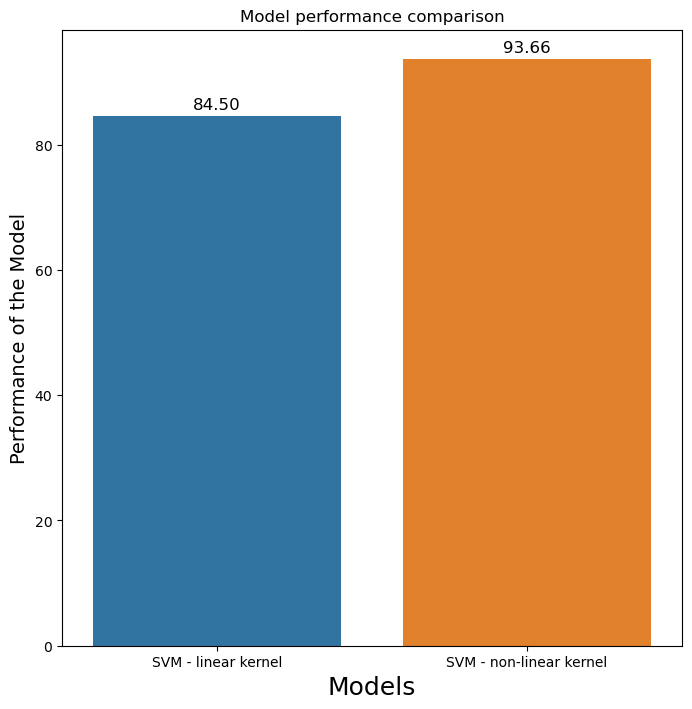

In [20]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating our own dataframe
accuracy_results = {"Model Names" : ['SVM - linear kernel', 'SVM - non-linear kernel',],
        "Accuracy": [linear_svm_model.score(X_val, y_val)*100, 
                     non_linear_svm_model.score(X_val, y_val)*100,]}
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Models", size=18)
 
# Setting the label for y-axis
plt.ylabel("Performance of the Model", size=14)

# Setting the title for the graph
plt.title("Model performance comparison")

# Finally showing the plot
plt.show()

# Test results on best model

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       163
           1       0.99      0.93      0.96       146
           2       0.87      0.96      0.91       156
           3       0.95      0.93      0.94       151
           4       0.89      0.96      0.92       160
           5       0.97      0.98      0.97       171
           6       0.84      0.92      0.88       153
           7       0.97      0.98      0.97       149
           8       0.94      0.97      0.95       149
           9       0.98      0.98      0.98       168
          10       0.96      0.97      0.96       154
          11       0.90      0.94      0.92       145
          12       0.81      0.93      0.87       160
          13       0.89      0.94      0.91       140
          14       0.98      0.91      0.94       137
          15       0.95      0.78      0.86       144
          16       0.96      0.97      0.97       148
          17       0.99    

ValueError: The number of FixedLocator locations (26), usually from a call to set_ticks, does not match the number of ticklabels (2).

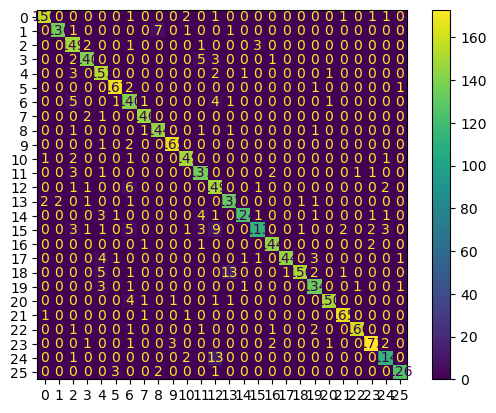

In [21]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

best_model_predictions = non_linear_svm_model.predict(X_test)


print(classification_report(y_test, best_model_predictions))

plot_confusion_matrix(non_linear_svm_model, X_test, y_test, display_labels=['non-commercial','commercial'])

print("Accuracy : {:.2f} % \n\n\n".format(non_linear_svm_model.score(X_test, y_test)*100))